# Analysis of the docked protein

## Installing and importing the necessary libraries

In [1]:
# installing the libraries 
install.packages("tidyverse")
install.packages("ggthemes")
install.packages("ggplot2")
install.packages("dplyr")

# importing the libraries
library(tidyverse)
library(ggthemes)
library(ggplot2)
library(dplyr)


The downloaded binary packages are in
	/var/folders/0x/y8lgwckd5jzdqrbj98g26nym0000gn/T//RtmpEBwZTf/downloaded_packages

The downloaded binary packages are in
	/var/folders/0x/y8lgwckd5jzdqrbj98g26nym0000gn/T//RtmpEBwZTf/downloaded_packages

The downloaded binary packages are in
	/var/folders/0x/y8lgwckd5jzdqrbj98g26nym0000gn/T//RtmpEBwZTf/downloaded_packages

The downloaded binary packages are in
	/var/folders/0x/y8lgwckd5jzdqrbj98g26nym0000gn/T//RtmpEBwZTf/downloaded_packages


── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Reading the csv file that has the results of the simulation

In [27]:
dock <- read_csv("docked.csv")
head(dock)

Rows: 7335 Columns: 15
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): type, previous_aa, new_aa_1l, new_aa_3l, conversion, new_seq, secon...
dbl (8): residue_number, fa_score, ddg_score, hbond_score, sasa_score, diff_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,new_seq,fa_score,ddg_score,hbond_score,sasa_score,secondary_structure,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,NA,NA,MEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4582.644,0.0000000,228,18665.82,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,0.00000,0
mutant,1,M,A,ALA,1MtoA,AEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4582.797,0.1532421,228,18569.42,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,-96.40225,0
mutant,1,M,C,CYS,1MtoC,CEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4592.105,9.4604330,228,18612.96,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,-52.85661,0
mutant,1,M,D,ASP,1MtoD,DEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4584.285,1.6412018,228,18612.52,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,-53.29715,0
mutant,1,M,E,GLU,1MtoE,EEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLT

**Removing the amino acid sequence and the secondary sequence to make the data more readable**

In [30]:
dock_short <- dock |> select(-c(new_seq, secondary_structure, conversion, new_aa_3l))
head(dock_short)

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,4582.644,0.0000000,228,18665.82,0,0.00000,0
mutant,1,M,A,4582.797,0.1532421,228,18569.42,0,-96.40225,0
mutant,1,M,C,4592.105,9.4604330,228,18612.96,0,-52.85661,0
mutant,1,M,D,4584.285,1.6412018,228,18612.52,0,-53.29715,0
mutant,1,M,E,4587.564,4.9202476,228,18647.33,0,-18.48876,0
mutant,1,M,F,4595.891,13.2463685,228,18676.95,0,11.13349,0


## General Analysis 

### delta delta score
> it seems that changing amino acids to P results in a higher delta delta g 

In [37]:
ddg_descending <- dock_short |> arrange(desc(ddg_score)) |> head(n = 100)
table(sth$new_aa_1l)
ddg_descending |> head(n = 10)


 F  H  P  W  Y 
 1  1 80 16  2 

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,141,K,P,9592.640,5009.995,227,18624.28,-1,-41.543762,0
mutant,11,K,P,9522.090,4939.446,227,18635.02,-1,-30.804448,0
mutant,57,K,P,9501.545,4918.901,227,18631.32,-1,-34.505152,2
mutant,242,E,P,9493.921,4911.276,227,18671.89,-1,6.069262,2
mutant,219,R,P,9486.094,4903.449,227,18584.22,-1,-81.601651,0
mutant,75,R,P,9485.029,4902.384,227,18616.27,-1,-49.547291,2
mutant,139,K,P,9478.241,4895.597,227,18655.32,-1,-10.496775,0
mutant,168,K,P,9448.708,4866.064,227,18632.12,-1,-33.697142,1
mutant,300,K,P,9442.567,4859.923,227,18645.39,-1,-20.427853,0


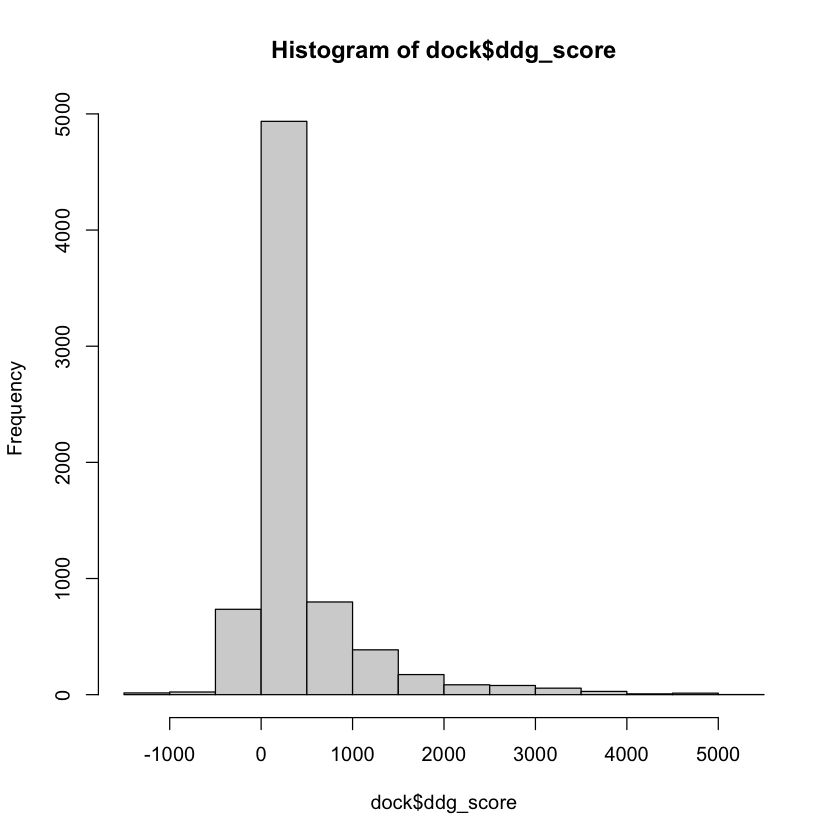

In [11]:
hist(dock$ddg_score)

In [12]:
dock |> filter(ddg_score > 4000)

type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,new_seq,fa_score,ddg_score,hbond_score,sasa_score,secondary_structure,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
mutant,11,K,P,PRO,11KtoP,MEAKTYIGKLPSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,9522.090,4939.446,227,18635.02,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,-1,-30.8044485,0
mutant,57,K,P,PRO,57KtoP,MEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRPLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,9501.545,4918.901,227,18631.32,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEELEEEEEELLLLLEEEEEEELEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,-1,-34.5051516,2
mutant,65,E,P,PRO,65EtoP,MEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNPDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,9426.282,4843.638,228,18652.86,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,-12.9576269,0
mutant,74,E,P,PRO,74EtoP,MEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYPRAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,9029.756,4447.112,227,18665.18,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,-1,-0.6394033,0
mutant,75,R,P,PRO,75RtoP,MEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYEPAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNT

In [18]:
sth <- dock |> arrange(sasa_score) |> select(-c(new_seq, secondary_structure)) |> arrange(desc(diff_sasa)) |> head(n = 50)
table(sth$new_aa_1l)


 A  F  G  H  S  T  W  Y 
 3  2  6  1  2  2 26  8 

In [20]:
dock |> arrange(sasa_score) |> select(-c(new_seq, secondary_structure)) |> arrange(desc(diff_sasa)) |> head(n = 50)

type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,118,G,W,TRP,118GtoW,5116.830,534.185979,228,18800.76,0,134.93586,0
mutant,171,A,W,TRP,171AtoW,4614.414,31.769952,228,18799.96,0,134.14203,0
mutant,264,G,W,TRP,264GtoW,5282.738,700.093309,228,18784.79,0,118.96541,0
mutant,295,G,W,TRP,295GtoW,4889.716,307.071983,228,18784.72,0,118.90064,0
mutant,83,G,W,TRP,83GtoW,4612.501,29.856985,228,18780.50,0,114.67899,0
mutant,369,G,W,TRP,369GtoW,4994.435,411.790403,228,18777.77,0,111.95015,0
mutant,257,Y,G,GLY,257YtoG,4589.480,6.836062,228,18768.24,0,102.42158,0
mutant,84,G,W,TRP,84GtoW,4619.098,36.453878,228,18767.86,0,102.03634,0
mutant,86,D,W,TRP,86DtoW,4587.365,4.720601,228,18763.05,0,97.23263,0
